## Upload Data

In [1]:
# run this cell
import syft as sy
from utils import *
print("Syft is imported")

/home/e/anaconda3/envs/Hagrid/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Syft is imported


In [9]:
domain_client = sy.login(email="info@openmined.org", password="changethis", port=8081)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to localhost... done! 	 Logging into adp... done!


In [2]:
domain_client = sy.login(
    url=auto_detect_domain_host_ip(),
    email="info@openmined.org",
    password="changethis"
)

Your DOMAIN_HOST_IP is: 2607:fea8:1c41:ed00:1dbb:d974:e13a:8ff4

Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Failed to convert url: http://2607:fea8:1c41:ed00:1dbb:d974:e13a:8ff4 to GridURL. invalid literal for int() with base 10: 'fea8'


ValueError: invalid literal for int() with base 10: 'fea8'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1893k  100 1893k    0     0  4312k      0 --:--:-- --:--:-- --:--:-- 4303k


TissueMNIST-e6916fbe07ec4302be04779d346e8a94.pkl is successfully downloaded.
Columns: Index(['patient_ids', 'images', 'labels'], dtype='object')
Total Images: 2363
Label Mapping {'Collecting Duct, Connecting Tubule': 0, 'Distal Convoluted Tubule': 1, 'Glomerular endothelial cells': 2, 'Interstitial endothelial cells': 3, 'Leukocytes': 4, 'Podocytes': 5, 'Proximal Tubule Segments': 6, 'Thick Ascending Limb': 7}


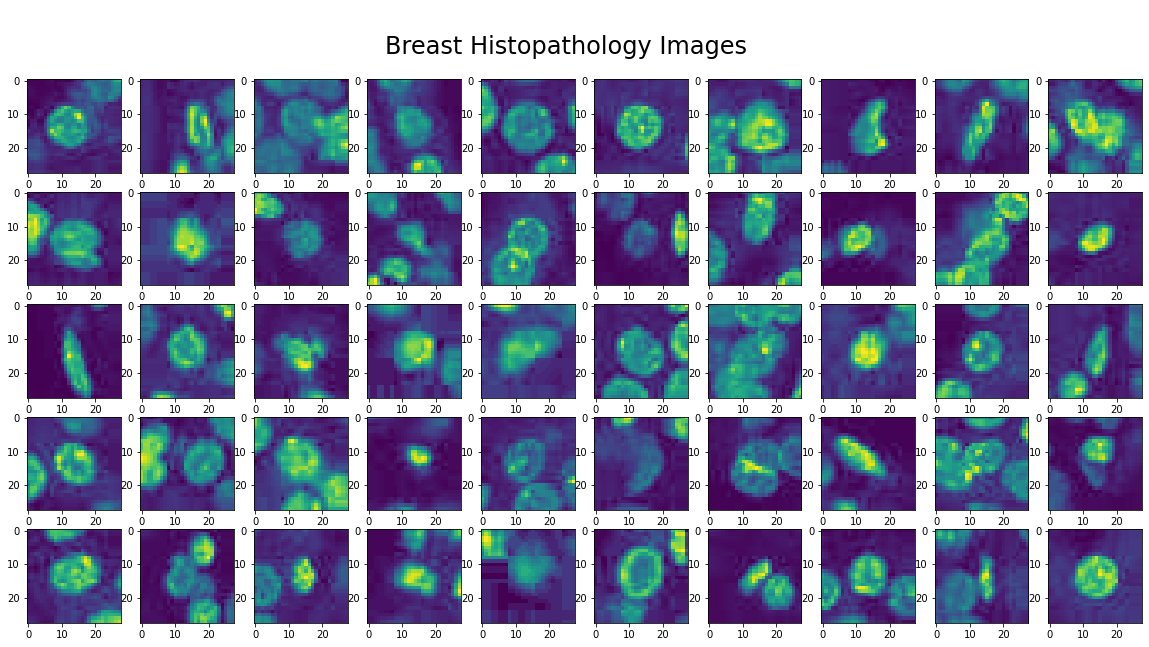

In [3]:
# edit MY_DATASET_URL then run this cell

MY_DATASET_URL = "https://raw.githubusercontent.com/OpenMined/datasets/main/TissueMNIST/subsets/TissueMNIST-e6916fbe07ec4302be04779d346e8a94.pkl"

dataset = download_dataset(MY_DATASET_URL)
# see footnotes for information about the dataset

In [4]:
dataset.head()

,patient_ids,images,labels
0,55614,"[[18, 24, 65, 110, 113, 90, 74, 68, 43, 29, 14...",4
1,55614,"[[5, 6, 9, 12, 10, 9, 15, 24, 33, 28, 28, 31, ...",1
2,55614,"[[15, 11, 10, 11, 10, 6, 6, 9, 9, 11, 12, 12, ...",5
3,55614,"[[6, 5, 5, 5, 5, 5, 4, 4, 8, 7, 6, 5, 5, 6, 6,...",7
4,55614,"[[31, 14, 13, 18, 11, 7, 13, 18, 11, 11, 12, 1...",0


In [5]:
# run this cell
train, val, test = split_and_preprocess_dataset(data=dataset)

Splitting dataset into train, validation and test sets.
Preprocessing the dataset...
Dims (1868, 3, 50, 50)
Dims (231, 3, 50, 50)
Dims (264, 3, 50, 50)
Preprocessing completed.


In [6]:
# run this cell
data_subjects = DataSubjectList.from_series(train["patient_ids"])
train_image_data = sy.Tensor(train["images"]).annotated_with_dp_metadata(
    min_val=0, max_val=255, data_subjects=data_subjects
)
train_label_data = sy.Tensor(train["labels"]).annotated_with_dp_metadata(
    min_val=0, max_val=1, data_subjects=data_subjects
)

Tensor annotated with DP Metadata
Tensor annotated with DP Metadata


In [7]:
data_subjects = DataSubjectList.from_series(val["patient_ids"])
val_image_data = sy.Tensor(val["images"]).annotated_with_dp_metadata(
    min_val=0, max_val=255, data_subjects=data_subjects
)
val_label_data = sy.Tensor(val["labels"]).annotated_with_dp_metadata(
    min_val=0, max_val=1, data_subjects=data_subjects
)

Tensor annotated with DP Metadata
Tensor annotated with DP Metadata


In [8]:
data_subjects = DataSubjectList.from_series(test["patient_ids"])
test_image_data = sy.Tensor(test["images"]).annotated_with_dp_metadata(
    min_val=0, max_val=255, data_subjects=data_subjects
)
test_label_data = sy.Tensor(test["labels"]).annotated_with_dp_metadata(
    min_val=0, max_val=1, data_subjects=data_subjects
)

Tensor annotated with DP Metadata
Tensor annotated with DP Metadata


In [10]:
# run this cell
domain_client.load_dataset(
    name="BreastCancerDataset",
    assets={
        "train_images": train_image_data,
        "train_labels": train_label_data,
        "val_images": val_image_data,
        "val_labels": val_label_data,
        "test_images": test_image_data,
        "test_labels": test_label_data,
    },
    description="Invasive Ductal Carcinoma (IDC) is the most common subtype of all breast cancers. \
    The modified dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. \
    Patches of size 50 x 50 were extracted from the original image. The labels 0 is non-IDC and 1 is IDC."
)

Loading dataset... uploading...🚀                                                                                                                                             

kj/filesystem-disk-unix.c++:1690: warning: PWD environment variable doesn't match current directory; pwd = /home/e/PycharmProjects/PySyft/notebooks/Experimental/Ishan
Uploading `test_labels`: 100%|███████████████████████████████████████| 1/1 [00:00<00:00, 241.47it/s]


Dataset is uploaded successfully !!! 🎉

Run `<your client variable>.datasets` to see your new dataset loaded into your machine!


In [11]:
# run this cell
domain_client.datasets

Idx,Name,Description,Assets,Id
[0],BreastCancerDataset,Invasive Ductal Carcinoma (IDC) is the most common subtype of all breast cancers. The modified dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. Patches of size 50 x 50 were extracted from the original image. The labels 0 is non-IDC and 1 is IDC.,"[""train_images""] -> [""train_labels""] -> [""val_images""] -> ...",b35267cc-0307-4557-b3de-bbd92fbb64b1
